This notebook is for experimenting with the affects of augmenting the training data.

In [1]:
#imports 
import os, shutil
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras import regularizers
import seaborn as sns
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

In [2]:
# # strings of directories for the different data
# train_images_dir = 'C:/Users/User/Desktop/hand_images/train'
# test_images_dir = 'C:/Users/User/Desktop/hand_images/test'

In [3]:
# strings of directories for the different data
train_images_dir = 'C:/Users/User/Documents/Flatiron/Capstone/train_data_guns'
test_images_dir = 'C:/Users/User/Documents/Flatiron/Capstone/test_data_guns'

In [4]:
# here I set 3 global variables: target size, batch size and epochs
# I do this because these variables are used quite often, so I wanted to be able to change it one place 
# and have it change everywhere in the rest of the notebook.
global_target_size = (127,127) # The size of the images
global_batch_size = 32 # The size of each batch being fed to the models
global_epochs = 250 # How many times each model should run through the entire dataset

In [5]:
train_val_generator = ImageDataGenerator(rescale=1./255,
                                         validation_split = .25,
                                        horizontal_flip = True,
                                    zoom_range = .05,
                                        height_shift_range = .1)

In [6]:
train_data = train_val_generator.flow_from_directory(train_images_dir,  
                                                     target_size = global_target_size,
                                                     subset='training',
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = True,
                                                    seed = 42)

Found 974 images belonging to 2 classes.


In [7]:
val_generator_aug = ImageDataGenerator(rescale=1./255,
                                         validation_split = .25)

In [8]:
val_data = val_generator_aug.flow_from_directory(train_images_dir,  
                                                     target_size = global_target_size,
                                                     subset='validation',
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = True,
                                                    seed = 42)

Found 323 images belonging to 2 classes.


In [9]:
model18 = models.Sequential()

# Stack 1
model18.add(layers.Conv2D(filters = 64,
                         kernel_size=(3,3),
                         activation='relu',
                         input_shape = (global_target_size[0],global_target_size[0], 3),
                         padding = 'same'
                        ))
model18.add(layers.MaxPooling2D(pool_size = (4,4),
                         padding = 'same'))

# Dropout Layer 1
model18.add(layers.Dropout(0.1))

# Stack 2
model18.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 2
model18.add(layers.Dropout(0.1))

# Stack 3
model18.add(layers.Conv2D(64, (4,4), activation='relu'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Stack 4
model18.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model18.add(layers.MaxPooling2D((2, 2),
                                padding = 'same'))

# Dropout Layer 3
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 4
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Flattening layer
model18.add(layers.Flatten())

# Dense layer 1
model18.add(layers.Dense(64, activation='relu'))

# Dense layer 2 - output layer
model18.add(layers.Dense(1, activation='sigmoid'))

model18.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

In [10]:
model18_history = model18.fit(train_data,
                    epochs=global_epochs,
                    validation_data = val_data
                   )

Epoch 1/250
31/31 [==============================] - 55s 2s/step - loss: 0.6944 - acc: 0.4846 - val_loss: 0.6920 - val_acc: 0.5232
Epoch 2/250
31/31 [==============================] - 48s 2s/step - loss: 0.6936 - acc: 0.5226 - val_loss: 0.6925 - val_acc: 0.5232
Epoch 3/250
31/31 [==============================] - 47s 2s/step - loss: 0.6925 - acc: 0.5226 - val_loss: 0.6920 - val_acc: 0.5232
Epoch 4/250
31/31 [==============================] - 47s 2s/step - loss: 0.6921 - acc: 0.5226 - val_loss: 0.6884 - val_acc: 0.6502
Epoch 5/250
31/31 [==============================] - 48s 2s/step - loss: 0.6706 - acc: 0.6006 - val_loss: 0.6366 - val_acc: 0.5944
Epoch 6/250
31/31 [==============================] - 47s 2s/step - loss: 0.6516 - acc: 0.6335 - val_loss: 0.5963 - val_acc: 0.7152
Epoch 7/250
31/31 [==============================] - 49s 2s/step - loss: 0.5929 - acc: 0.6920 - val_loss: 0.5006 - val_acc: 0.7399
Epoch 8/250
31/31 [==============================] - 48s 2s/step - loss: 0.5461 - a

31/31 [==============================] - 47s 2s/step - loss: 0.1210 - acc: 0.9528 - val_loss: 0.4987 - val_acc: 0.8483
Epoch 64/250
31/31 [==============================] - 47s 2s/step - loss: 0.0823 - acc: 0.9713 - val_loss: 0.5603 - val_acc: 0.8452
Epoch 65/250
31/31 [==============================] - 47s 2s/step - loss: 0.0589 - acc: 0.9784 - val_loss: 0.6550 - val_acc: 0.8173
Epoch 66/250
31/31 [==============================] - 47s 2s/step - loss: 0.0665 - acc: 0.9774 - val_loss: 0.5373 - val_acc: 0.8390
Epoch 67/250
31/31 [==============================] - 47s 2s/step - loss: 0.0484 - acc: 0.9795 - val_loss: 0.5941 - val_acc: 0.8204
Epoch 68/250
31/31 [==============================] - 47s 2s/step - loss: 0.0617 - acc: 0.9784 - val_loss: 0.5577 - val_acc: 0.8452
Epoch 69/250
31/31 [==============================] - 47s 2s/step - loss: 0.0628 - acc: 0.9795 - val_loss: 0.6196 - val_acc: 0.8359
Epoch 70/250
31/31 [==============================] - 48s 2s/step - loss: 0.0385 - acc: 0

Epoch 125/250
31/31 [==============================] - 47s 2s/step - loss: 0.0127 - acc: 0.9969 - val_loss: 0.9973 - val_acc: 0.8266
Epoch 126/250
31/31 [==============================] - 47s 2s/step - loss: 0.0262 - acc: 0.9887 - val_loss: 0.9230 - val_acc: 0.8173
Epoch 127/250
31/31 [==============================] - 47s 2s/step - loss: 0.0727 - acc: 0.9743 - val_loss: 0.6329 - val_acc: 0.8328
Epoch 128/250
31/31 [==============================] - 47s 2s/step - loss: 0.0552 - acc: 0.9784 - val_loss: 0.5669 - val_acc: 0.8514
Epoch 129/250
31/31 [==============================] - 47s 2s/step - loss: 0.0280 - acc: 0.9897 - val_loss: 0.8049 - val_acc: 0.8142
Epoch 130/250
31/31 [==============================] - 47s 2s/step - loss: 0.0361 - acc: 0.9887 - val_loss: 1.0041 - val_acc: 0.7957
Epoch 131/250
31/31 [==============================] - 47s 2s/step - loss: 0.0166 - acc: 0.9938 - val_loss: 1.0736 - val_acc: 0.8019
Epoch 132/250
31/31 [==============================] - 47s 2s/step - 

31/31 [==============================] - 47s 2s/step - loss: 0.0518 - acc: 0.9856 - val_loss: 0.7745 - val_acc: 0.8390
Epoch 187/250
31/31 [==============================] - 47s 2s/step - loss: 0.0236 - acc: 0.9938 - val_loss: 1.0987 - val_acc: 0.8019
Epoch 188/250
31/31 [==============================] - 47s 2s/step - loss: 0.0132 - acc: 0.9938 - val_loss: 1.0748 - val_acc: 0.7833
Epoch 189/250
31/31 [==============================] - 47s 2s/step - loss: 0.0162 - acc: 0.9959 - val_loss: 0.9390 - val_acc: 0.8421
Epoch 190/250
31/31 [==============================] - 47s 2s/step - loss: 0.0100 - acc: 0.9959 - val_loss: 0.8676 - val_acc: 0.8483
Epoch 191/250
31/31 [==============================] - 47s 2s/step - loss: 0.0065 - acc: 0.9979 - val_loss: 1.0025 - val_acc: 0.8452
Epoch 192/250
31/31 [==============================] - 47s 2s/step - loss: 0.0057 - acc: 0.9979 - val_loss: 0.9827 - val_acc: 0.8421
Epoch 193/250
31/31 [==============================] - 48s 2s/step - loss: 0.0167 -

31/31 [==============================] - 47s 2s/step - loss: 0.0280 - acc: 0.9897 - val_loss: 0.7491 - val_acc: 0.8204
Epoch 248/250
31/31 [==============================] - 47s 2s/step - loss: 0.0160 - acc: 0.9938 - val_loss: 0.7990 - val_acc: 0.8235
Epoch 249/250
31/31 [==============================] - 47s 2s/step - loss: 0.0038 - acc: 0.9990 - val_loss: 1.0100 - val_acc: 0.8173
Epoch 250/250
31/31 [==============================] - 47s 2s/step - loss: 0.0042 - acc: 0.9979 - val_loss: 1.2058 - val_acc: 0.8142


In [11]:
model18.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        3

In [12]:
model_18_train_results = model18.evaluate(train_data)
model_18_train_results

model_18_val_results = model18.evaluate(val_data)
model_18_val_results

11/11 [==============================] - 6s 513ms/step - loss: 1.2058 - acc: 0.8142


[1.2058329582214355, 0.8142414689064026]

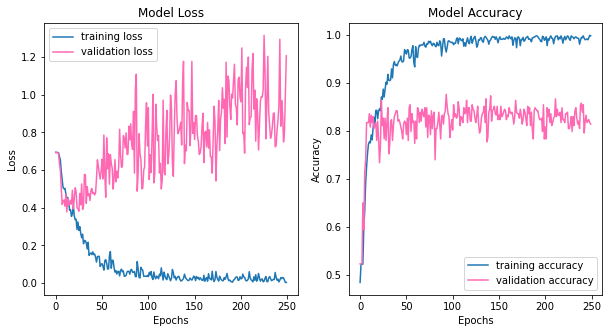

In [13]:
# visualizing loss and accuracy per epoch
model18_train_loss = model18_history.history['loss']
model18_train_acc = model18_history.history['acc']
model18_val_loss = model18_history.history['val_loss']
model18_val_acc = model18_history.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=model18_history.epoch, y=model18_train_loss, ax=ax1, label='training loss')
sns.lineplot(x=model18_history.epoch, y=model18_train_acc, ax=ax2, label='training accuracy')

sns.lineplot(x=model18_history.epoch, y=model18_val_loss, ax=ax1, label='validation loss',color = 'hotpink')
sns.lineplot(x=model18_history.epoch, y=model18_val_acc, ax=ax2, label='validation accuracy',color = 'hotpink')

ax1.set(xlabel = 'Epochs')
ax2.set(xlabel = 'Epochs')

ax1.set(ylabel = 'Loss')
ax2.set(ylabel = 'Accuracy')

ax1.set(title='Model Loss')
ax2.set(title='Model Accuracy')

fig.savefig("../Visuals/final_model_accuracy",bbox_inches='tight',transparent = True);

# Baseline

In [14]:
baseline = models.Sequential()

# stack 1
baseline.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(global_target_size[0], global_target_size[0],  3)))
baseline.add(layers.MaxPooling2D((2, 2)))

# stack 2
baseline.add(layers.Conv2D(32, (4, 4), activation='relu'))
baseline.add(layers.MaxPooling2D((2, 2)))

# stack 3
baseline.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline.add(layers.MaxPooling2D((2, 2)))

# flattening layer
baseline.add(layers.Flatten())

# Dense Layer 1 
baseline.add(layers.Dense(64, activation='relu'))

# Dense Layer 2 // output layer
baseline.add(layers.Dense(1, activation='sigmoid'))


## Compiling baseline 
baseline.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [15]:
baseline_history = baseline.fit(train_data,
                    epochs=global_epochs,
                    validation_data = val_data
                   )

Epoch 1/250
31/31 [==============================] - 48s 2s/step - loss: 0.6938 - acc: 0.4928 - val_loss: 0.6859 - val_acc: 0.5232
Epoch 2/250
31/31 [==============================] - 48s 2s/step - loss: 0.6901 - acc: 0.5308 - val_loss: 0.6823 - val_acc: 0.5232
Epoch 3/250
31/31 [==============================] - 47s 2s/step - loss: 0.6900 - acc: 0.5144 - val_loss: 0.6806 - val_acc: 0.5387
Epoch 4/250
31/31 [==============================] - 47s 2s/step - loss: 0.6871 - acc: 0.5606 - val_loss: 0.6779 - val_acc: 0.5542
Epoch 5/250
31/31 [==============================] - 47s 2s/step - loss: 0.6844 - acc: 0.5503 - val_loss: 0.6765 - val_acc: 0.6347
Epoch 6/250
31/31 [==============================] - 47s 2s/step - loss: 0.6825 - acc: 0.5760 - val_loss: 0.6731 - val_acc: 0.6533
Epoch 7/250
31/31 [==============================] - 47s 2s/step - loss: 0.6785 - acc: 0.5903 - val_loss: 0.6691 - val_acc: 0.5418
Epoch 8/250
31/31 [==============================] - 47s 2s/step - loss: 0.6756 - a

31/31 [==============================] - 48s 2s/step - loss: 0.5112 - acc: 0.7423 - val_loss: 0.4598 - val_acc: 0.7864
Epoch 64/250
31/31 [==============================] - 47s 2s/step - loss: 0.5023 - acc: 0.7669 - val_loss: 0.4730 - val_acc: 0.8080
Epoch 65/250
31/31 [==============================] - 48s 2s/step - loss: 0.5213 - acc: 0.7505 - val_loss: 0.4696 - val_acc: 0.7988
Epoch 66/250
31/31 [==============================] - 47s 2s/step - loss: 0.5022 - acc: 0.7413 - val_loss: 0.4642 - val_acc: 0.7864
Epoch 67/250
31/31 [==============================] - 47s 2s/step - loss: 0.5009 - acc: 0.7474 - val_loss: 0.4659 - val_acc: 0.7926
Epoch 68/250
31/31 [==============================] - 47s 2s/step - loss: 0.5120 - acc: 0.7485 - val_loss: 0.4757 - val_acc: 0.7895
Epoch 69/250
31/31 [==============================] - 47s 2s/step - loss: 0.5020 - acc: 0.7536 - val_loss: 0.4929 - val_acc: 0.7647
Epoch 70/250
31/31 [==============================] - 47s 2s/step - loss: 0.4794 - acc: 0

Epoch 125/250
31/31 [==============================] - 48s 2s/step - loss: 0.3108 - acc: 0.8706 - val_loss: 0.4316 - val_acc: 0.7957
Epoch 126/250
31/31 [==============================] - 48s 2s/step - loss: 0.3030 - acc: 0.8655 - val_loss: 0.4798 - val_acc: 0.7771
Epoch 127/250
31/31 [==============================] - 48s 2s/step - loss: 0.2847 - acc: 0.8881 - val_loss: 0.4996 - val_acc: 0.7740
Epoch 128/250
31/31 [==============================] - 48s 2s/step - loss: 0.2890 - acc: 0.8727 - val_loss: 0.5932 - val_acc: 0.7554
Epoch 129/250
31/31 [==============================] - 48s 2s/step - loss: 0.2891 - acc: 0.8809 - val_loss: 0.5401 - val_acc: 0.7802
Epoch 130/250
31/31 [==============================] - 48s 2s/step - loss: 0.3007 - acc: 0.8676 - val_loss: 0.5106 - val_acc: 0.7492
Epoch 131/250
31/31 [==============================] - 48s 2s/step - loss: 0.2765 - acc: 0.8830 - val_loss: 0.5802 - val_acc: 0.7492
Epoch 132/250
31/31 [==============================] - 48s 2s/step - 

31/31 [==============================] - 47s 2s/step - loss: 0.0787 - acc: 0.9723 - val_loss: 0.7118 - val_acc: 0.7740
Epoch 187/250
31/31 [==============================] - 47s 2s/step - loss: 0.0722 - acc: 0.9754 - val_loss: 0.7762 - val_acc: 0.7276
Epoch 188/250
31/31 [==============================] - 47s 2s/step - loss: 0.0970 - acc: 0.9671 - val_loss: 0.8776 - val_acc: 0.7430
Epoch 189/250
31/31 [==============================] - 47s 2s/step - loss: 0.0865 - acc: 0.9702 - val_loss: 0.8091 - val_acc: 0.6997
Epoch 190/250
31/31 [==============================] - 47s 2s/step - loss: 0.1222 - acc: 0.9507 - val_loss: 0.7975 - val_acc: 0.7337
Epoch 191/250
31/31 [==============================] - 47s 2s/step - loss: 0.0760 - acc: 0.9743 - val_loss: 0.6466 - val_acc: 0.7771
Epoch 192/250
31/31 [==============================] - 47s 2s/step - loss: 0.1067 - acc: 0.9641 - val_loss: 0.7016 - val_acc: 0.7554
Epoch 193/250
31/31 [==============================] - 47s 2s/step - loss: 0.0716 -

Epoch 248/250
31/31 [==============================] - 48s 2s/step - loss: 0.0350 - acc: 0.9877 - val_loss: 0.9340 - val_acc: 0.7554
Epoch 249/250
31/31 [==============================] - 47s 2s/step - loss: 0.0207 - acc: 0.9949 - val_loss: 1.1395 - val_acc: 0.7678
Epoch 250/250
31/31 [==============================] - 47s 2s/step - loss: 0.0182 - acc: 0.9938 - val_loss: 0.9139 - val_acc: 0.7802


In [16]:
baseline_train_results = baseline.evaluate(train_data)
baseline_train_results
baseline_val_results = baseline.evaluate(val_data)
baseline_val_results

11/11 [==============================] - 6s 531ms/step - loss: 0.9139 - acc: 0.7802


[0.9138656258583069, 0.7801857590675354]

<AxesSubplot:>

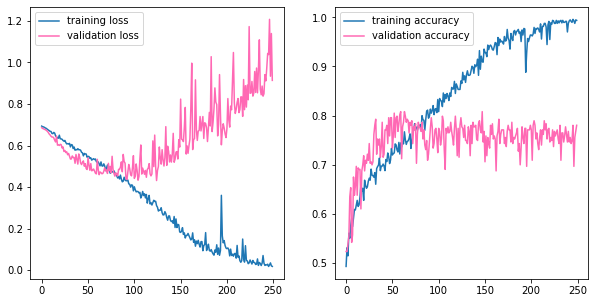

In [17]:
# visualizing loss and accuracy per epoch
baseline_train_loss = baseline_history.history['loss']
baseline_train_acc = baseline_history.history['acc']
baseline_val_loss = baseline_history.history['val_loss']
baseline_val_acc = baseline_history.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=baseline_history.epoch, y=baseline_train_loss, ax=ax1, label='training loss')
sns.lineplot(x=baseline_history.epoch, y=baseline_train_acc, ax=ax2, label='training accuracy')

sns.lineplot(x=baseline_history.epoch, y=baseline_val_loss, ax=ax1, label='validation loss',color ='hotpink')
sns.lineplot(x=baseline_history.epoch, y=baseline_val_acc, ax=ax2, label='validation accuracy',color ='hotpink')



# Testing Data

In [18]:
test_generator = ImageDataGenerator(rescale=1./255)

In [19]:
test_data = test_generator.flow_from_directory(test_images_dir,  
                                                     target_size = global_target_size,
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = False,
                                                    seed = 42)

Found 237 images belonging to 2 classes.


In [20]:
test_score =  model18.evaluate(test_data)
test_score

8/8 [==============================] - 9s 1s/step - loss: 1.6358 - acc: 0.7806


[1.6357828378677368, 0.7805907130241394]

In [21]:
baseline_score =  baseline.evaluate(test_data)
baseline_score

8/8 [==============================] - 8s 942ms/step - loss: 1.1170 - acc: 0.7215


[1.117029070854187, 0.7215189933776855]

In [22]:
model_18_predictions = model18.predict(test_data)

In [23]:
# getting predictions from sigmoid probabilities
predictions = [] 
for value in model_18_predictions:
    if value > .25:
        predictions.append(1)
    else:
        predictions.append(0)
    
print(predictions)
# labels
labels = test_data.labels
print(labels)

[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

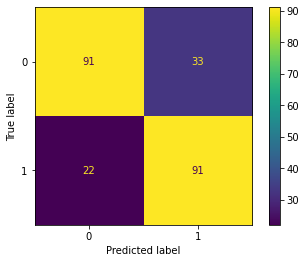

In [24]:
# creating confusion matrix
matrix = confusion_matrix(labels, predictions)
conf_matrix = ConfusionMatrixDisplay(matrix)
conf_matrix.plot();

In [25]:
test_data_viz = test_generator.flow_from_directory(test_images_dir,  
                                                     target_size = global_target_size,
                                                     batch_size=239,
                                                     class_mode='binary',
                                                    shuffle = False,
                                                    seed = 42)

Found 237 images belonging to 2 classes.


In [26]:
incorrects = np.nonzero(predictions != labels)

In [27]:
incorrects

(array([  0,   1,   3,   4,   6,   8,   9,  10,  11,  12,  15,  17,  35,
         43,  59,  61,  63,  66,  76,  82,  84,  86,  87,  88,  89,  90,
         92,  93,  94, 103, 106, 107, 113, 125, 126, 128, 173, 174, 175,
        178, 179, 180, 182, 183, 198, 199, 204, 209, 211, 212, 216, 220,
        221, 222, 224], dtype=int64),)

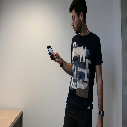

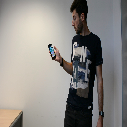

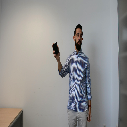

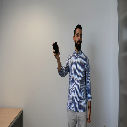

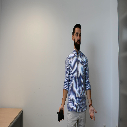

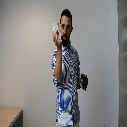

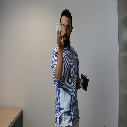

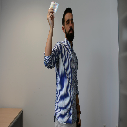

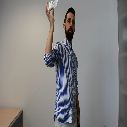

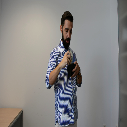

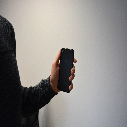

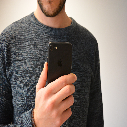

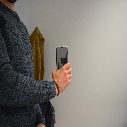

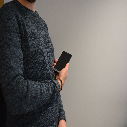

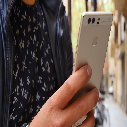

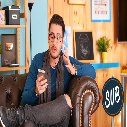

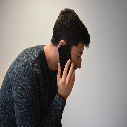

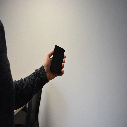

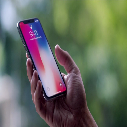

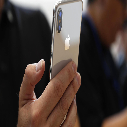

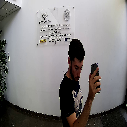

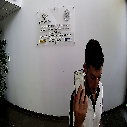

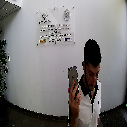

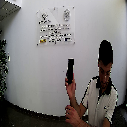

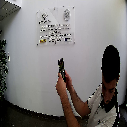

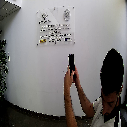

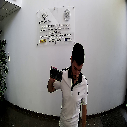

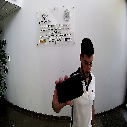

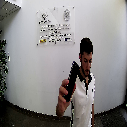

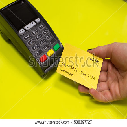

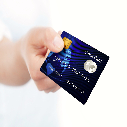

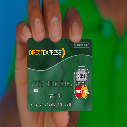

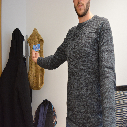

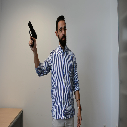

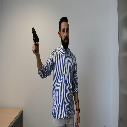

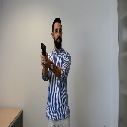

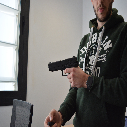

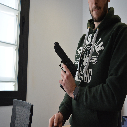

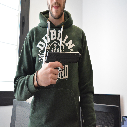

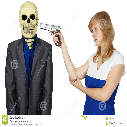

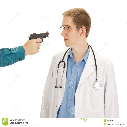

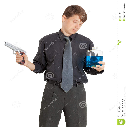

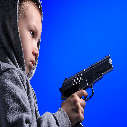

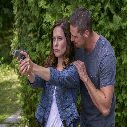

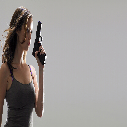

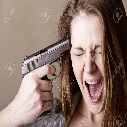

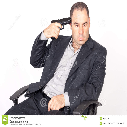

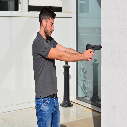

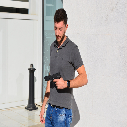

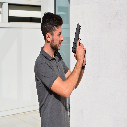

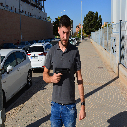

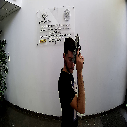

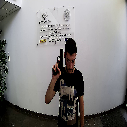

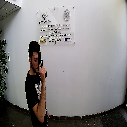

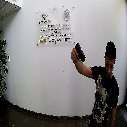

In [28]:
for index in incorrects[0]:
    display(array_to_img(test_data_viz[0][0][index]))

In [29]:
corrects = np.nonzero(predictions == labels)

In [30]:
corrects

(array([  2,   5,   7,  13,  14,  16,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  36,  37,  38,
         39,  40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  60,  62,  64,  65,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  77,  78,  79,  80,  81,  83,  85,
         91,  95,  96,  97,  98,  99, 100, 101, 102, 104, 105, 108, 109,
        110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
        124, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 176, 177, 181, 184, 185, 186,
        187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201,
        202, 203, 205, 206, 207, 208, 210, 213, 214, 215, 217, 218, 219,
        223, 225, 226, 227, 228, 229, 230, 231, 232

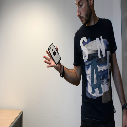

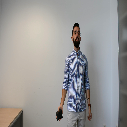

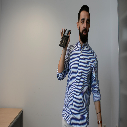

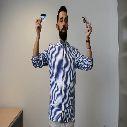

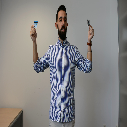

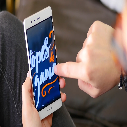

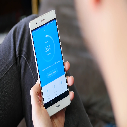

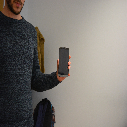

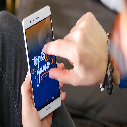

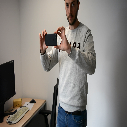

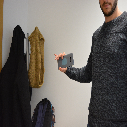

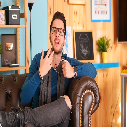

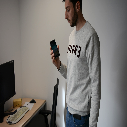

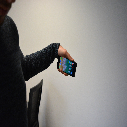

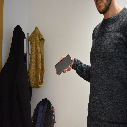

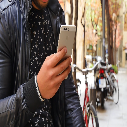

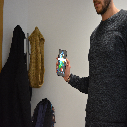

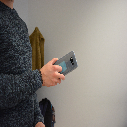

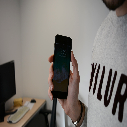

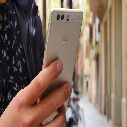

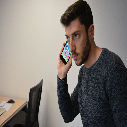

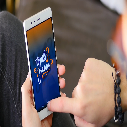

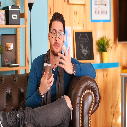

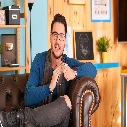

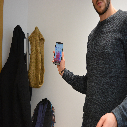

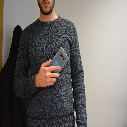

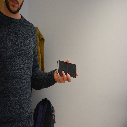

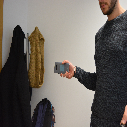

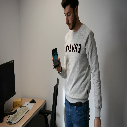

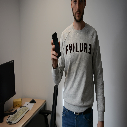

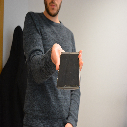

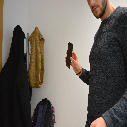

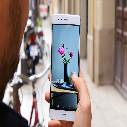

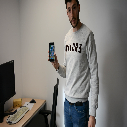

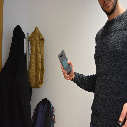

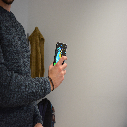

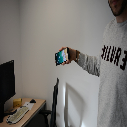

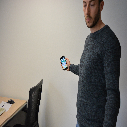

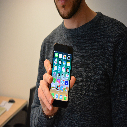

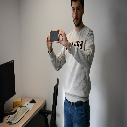

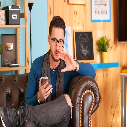

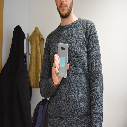

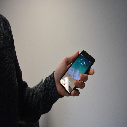

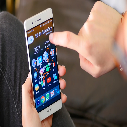

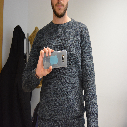

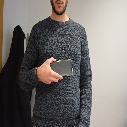

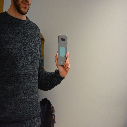

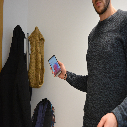

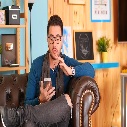

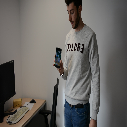

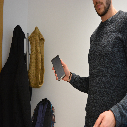

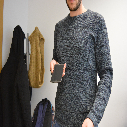

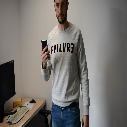

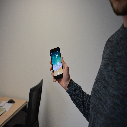

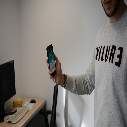

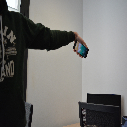

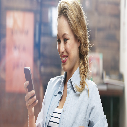

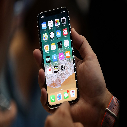

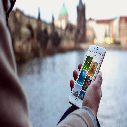

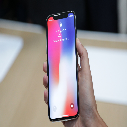

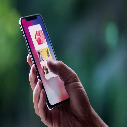

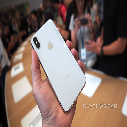

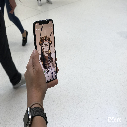

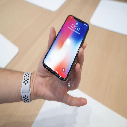

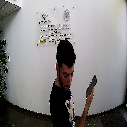

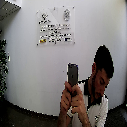

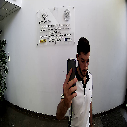

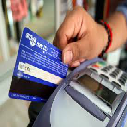

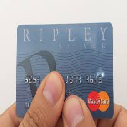

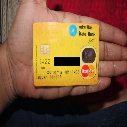

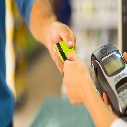

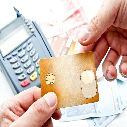

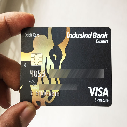

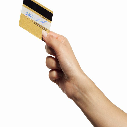

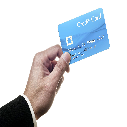

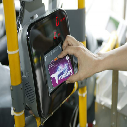

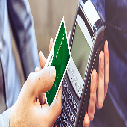

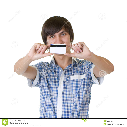

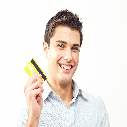

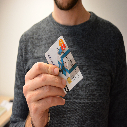

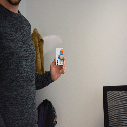

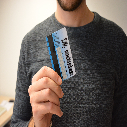

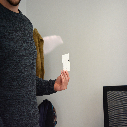

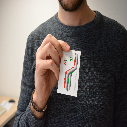

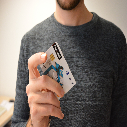

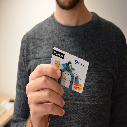

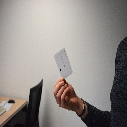

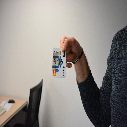

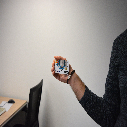

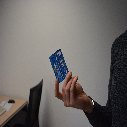

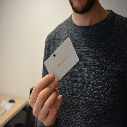

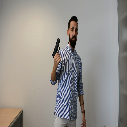

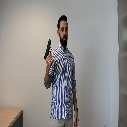

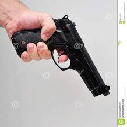

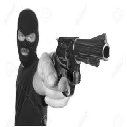

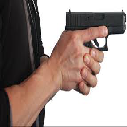

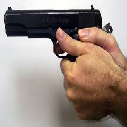

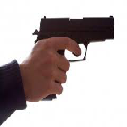

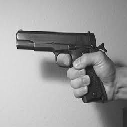

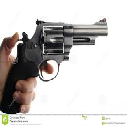

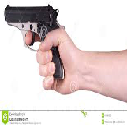

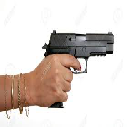

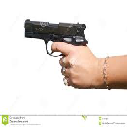

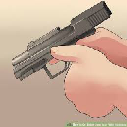

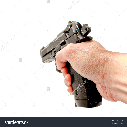

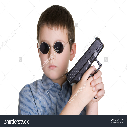

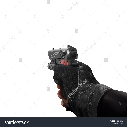

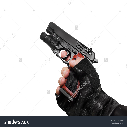

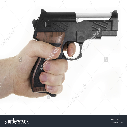

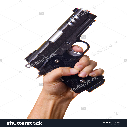

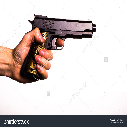

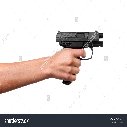

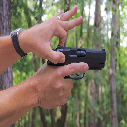

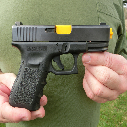

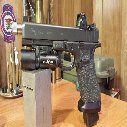

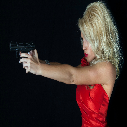

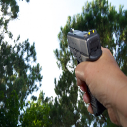

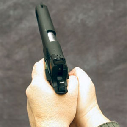

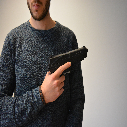

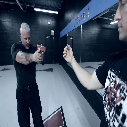

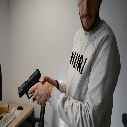

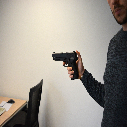

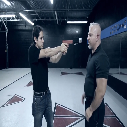

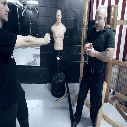

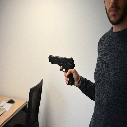

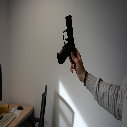

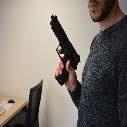

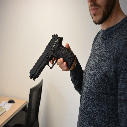

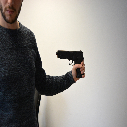

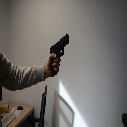

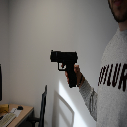

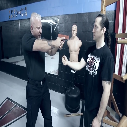

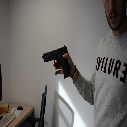

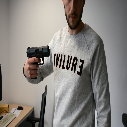

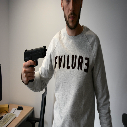

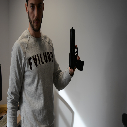

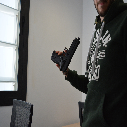

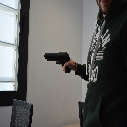

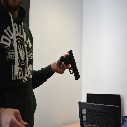

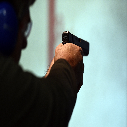

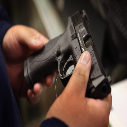

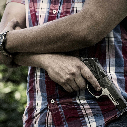

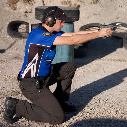

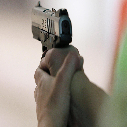

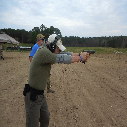

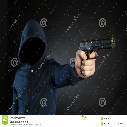

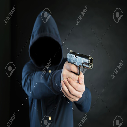

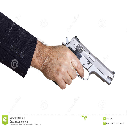

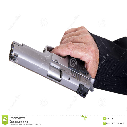

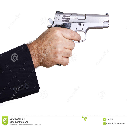

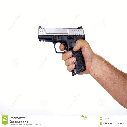

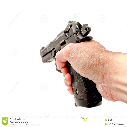

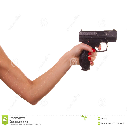

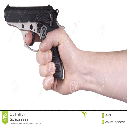

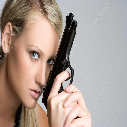

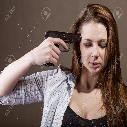

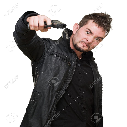

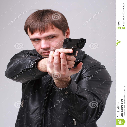

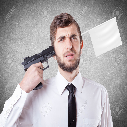

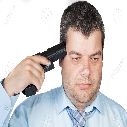

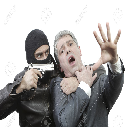

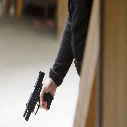

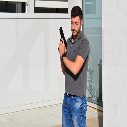

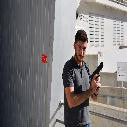

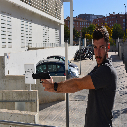

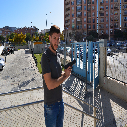

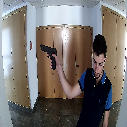

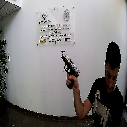

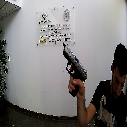

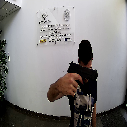

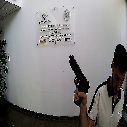

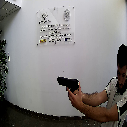

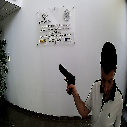

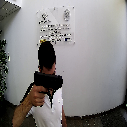

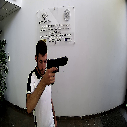

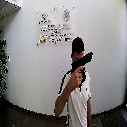

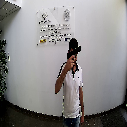

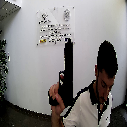

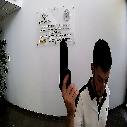

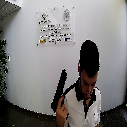

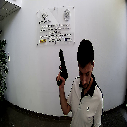

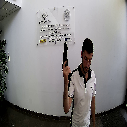

In [31]:
for index in corrects[0]:
    display(array_to_img(test_data_viz[0][0][index]))